In [134]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import scipy.special as sc
import pandas as pd
import glob
import statsmodels.api as sm
import scipy.stats as st
import math
import csv
import datetime


In [135]:
dati_traffico_oct2015 = pd.read_csv('traffico_milano/CITTA_METROPOLITANA_MILANO_-_2015_Dati_traffico_Ottobre_Novembre_Dicembre_20241211.csv', sep = ',', decimal = '.')
dati_traffico_lug2015 = pd.read_csv('traffico_milano/CITTA_METROPOLITANA_MILANO_-_2015_Dati_traffico_Luglio_Agosto_Settembre_20241211.csv', sep = ',', decimal = '.')
dati_traffico_apr2016 = pd.read_csv('traffico_milano/CITTA_METROPOLITANA_MILANO_-_2016_Dati_traffico_Aprile_Maggio_Giugno_20241211.csv', sep = ',', decimal = '.')
dati_traffico_gen2016 = pd.read_csv('traffico_milano/CITTA_METROPOLITANA_MILANO_-_2016_Dati_traffico_Gennaio_Febbraio_Marzo_20241211.csv', sep = ',', decimal = '.')
dati_traffico_oct2016 = pd.read_csv('traffico_milano/CITTA_METROPOLITANA_MILANO_-_2016_Dati_traffico_Ottobre_Novembre_Dicembre_20241211.csv', sep = ',', decimal = '.')

In [136]:
dati_traffico = pd.DataFrame()

for i, elem in enumerate(dati_traffico_oct2015['Data']) :
    dati_traffico_oct2015.loc[i, 'Data'] = datetime.datetime.strptime(str(elem), '%m/%d/%Y').weekday()
dati_traffico = pd.concat([dati_traffico, dati_traffico_oct2015])
for i, elem in enumerate(dati_traffico_lug2015['Data']) :
    dati_traffico_lug2015.loc[i, 'Data'] = datetime.datetime.strptime(str(elem), '%m/%d/%Y').weekday()
dati_traffico = pd.concat([dati_traffico, dati_traffico_lug2015])
for i, elem in enumerate(dati_traffico_apr2016['Data']) :
    dati_traffico_apr2016.loc[i, 'Data'] = datetime.datetime.strptime(str(elem), '%d/%m/%Y').weekday()
dati_traffico = pd.concat([dati_traffico, dati_traffico_apr2016])
for i, elem in enumerate(dati_traffico_gen2016['Data']) :
    dati_traffico_gen2016.loc[i, 'Data'] = datetime.datetime.strptime(str(elem), '%m/%d/%Y').weekday()
dati_traffico = pd.concat([dati_traffico, dati_traffico_gen2016])
for i, elem in enumerate(dati_traffico_oct2016['Data']) :
    dati_traffico_oct2016.loc[i, 'Data'] = datetime.datetime.strptime(str(elem), '%m/%d/%Y').weekday()
dati_traffico = pd.concat([dati_traffico, dati_traffico_oct2016])

    
dati_traffico_sorted = dati_traffico.groupby(['Data'])['Passaggi_24h'].mean()/1000
dati_traffico_sorted

Data
0    16.561851
1    17.109033
2    17.410212
3    17.491372
4    17.656046
5    14.552459
6    12.205520
Name: Passaggi_24h, dtype: float64

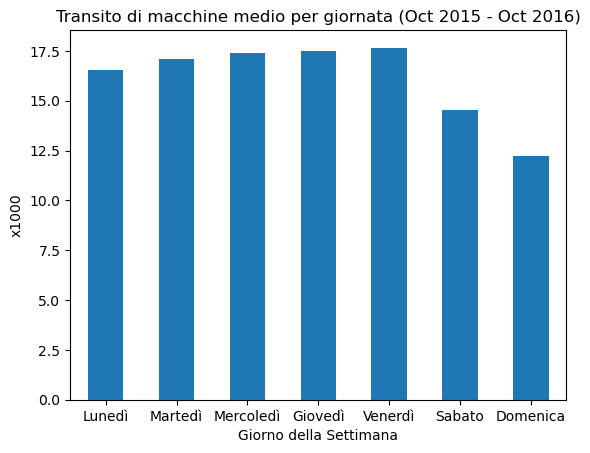

In [137]:
dati_traffico_sorted.plot(kind = 'bar')
plt.xlabel("Giorno della Settimana")
plt.xticks(rotation = 0)
plt.xticks((0, 1, 2, 3, 4, 5, 6), ('Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'))
plt.ylabel("x1000")
plt.title("Transito di macchine medio per giornata (Oct 2015 - Oct 2016)")
plt.show()


In [138]:
varco_c = pd.read_csv('varchi_area_c/ingressi_areac_2019-2023_no_dic.csv', sep = ';')
varco_c.head()

,data_giorno,numero_transiti_giornalieri
0,2023-11-30,142785
1,2023-11-29,144304
2,2023-11-28,145418
3,2023-11-27,134512
4,2023-11-26,107518


In [139]:
for i, elem in enumerate(varco_c['data_giorno']) :
    varco_c.loc[i, 'data_giorno'] = datetime.datetime.strptime(elem, '%Y-%m-%d').weekday()
varco_c_sorted = varco_c.groupby(['data_giorno'])['numero_transiti_giornalieri'].mean()/1000
varco_c_sorted

data_giorno
0    120.485035
1    129.182392
2    131.574800
3    133.490255
4    129.590567
5    109.050039
6     87.534878
Name: numero_transiti_giornalieri, dtype: float64

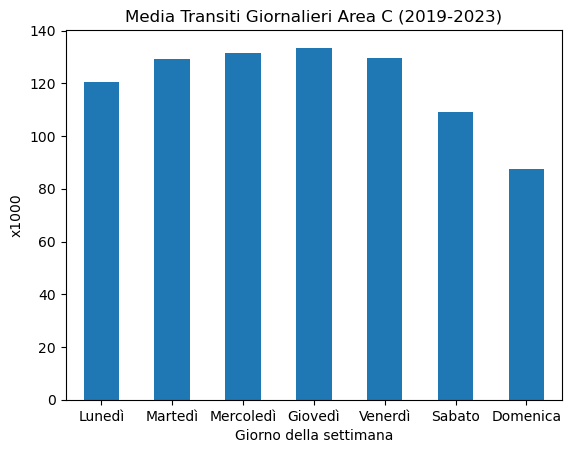

In [140]:
varco_c_sorted.plot(kind = 'bar')
plt.xlabel("Giorno della settimana")
plt.ylabel("x1000")
plt.xticks(rotation = 0)
plt.xticks((0, 1, 2, 3, 4, 5, 6), ('Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'))
plt.title("Media Transiti Giornalieri Area C (2019-2023)")
plt.show()